<a href="https://colab.research.google.com/github/abhijeet-samantaray/GrowthLink/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Number of Rows: 150, Number of Columns: 5
Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7

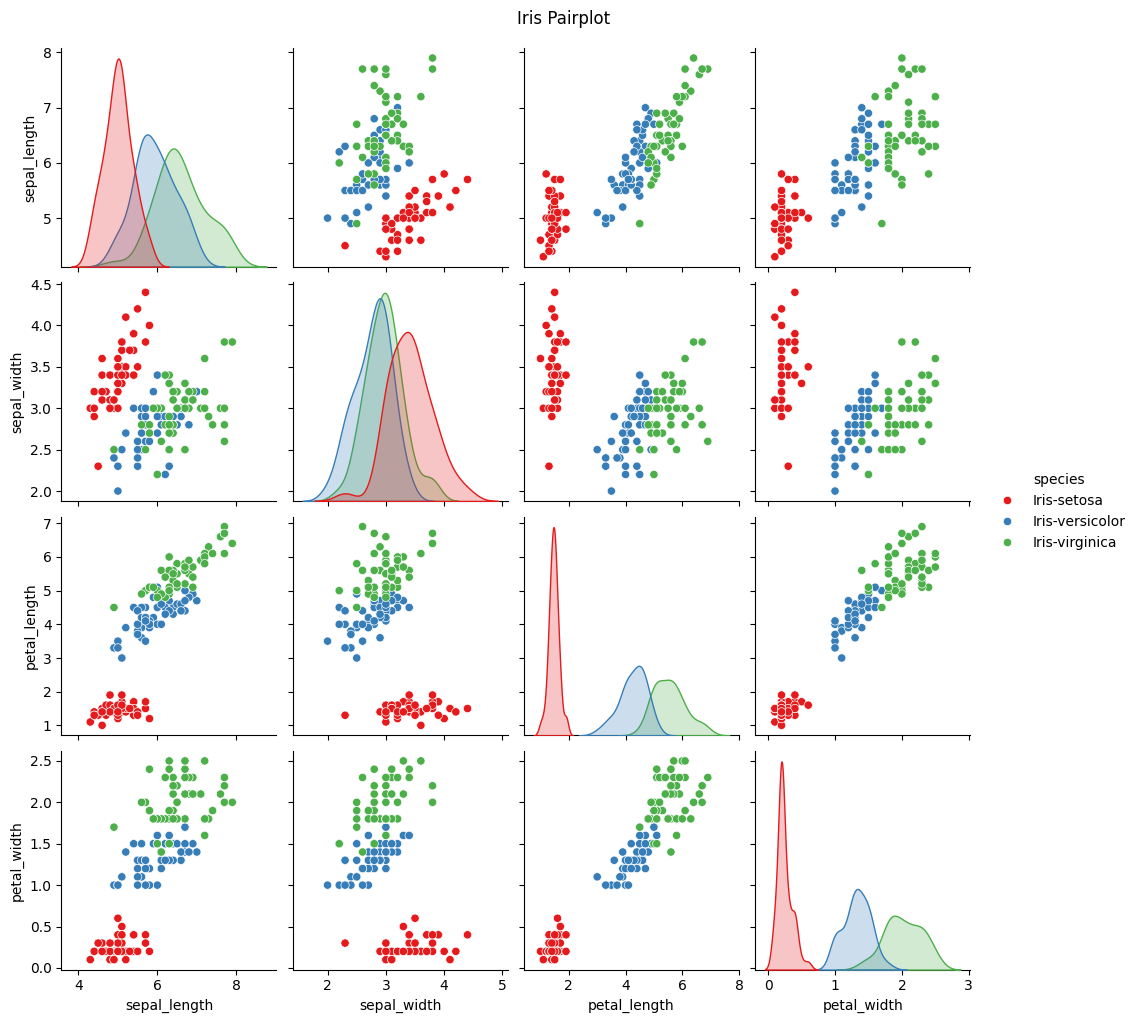

Model Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



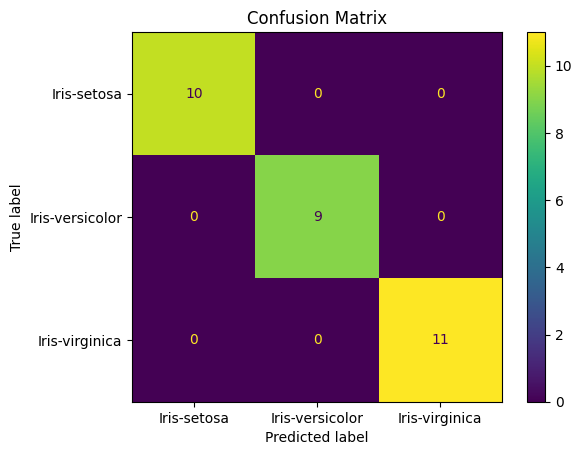

In [11]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load the Iris dataset
data_file_path = '/content/IRIS.csv'  # Path to the dataset
iris_data = pd.read_csv(data_file_path)

# Quick overview of the dataset
print("First five rows of the dataset:")
print(iris_data.head())  # Display the first few rows

# Display the number of rows and columns
print(f"Number of Rows: {iris_data.shape[0]}, Number of Columns: {iris_data.shape[1]}")

# Display summary statistics for numerical columns
print("Summary statistics:")
print(iris_data.describe())

# Check for missing values in the dataset
missing_values = iris_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check the distribution of species in the dataset
species_distribution = iris_data['species'].value_counts()
print("Species distribution:\n", species_distribution)

# Visualize pairwise relationships in the dataset
sns.pairplot(iris_data, hue='species', palette='Set1')
plt.suptitle('Iris Pairplot', y=1.02)  # Title for the plot
plt.show()  # Display the plot

# Prepare the features (X) and labels (y) for the model
X = iris_data.iloc[:, :-1]  # Features: all columns except the last one
y = iris_data['species']  # Labels: the species column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")  # Display accuracy

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Display a detailed classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

# Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()  # Display the confusion matrix plot